# Project - AirBnb Booking Analysis

## Project Type - Exploratory Data Analysis

## Contributor - Sourabh Pandey

### GitHub Link-

![picture](https://drive.google.com/uc?export=view&id=1q7-_1O9ZBGCLBXBizp0Tr3bfNCpvq68B)

# Project Summary-


Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. For hosts, it's a way to earn money while protecting their property from potential damage. However, for guests, it's a risky venture that they should avoid.

For this project we are analyzing Airbnb’s New York City(NYC) data of 2019. NYC is not only the most famous city in the world but also top global destination for visitors drawn to its museums, entertainment, restaurants and commerce. According to the Office of New York State Comptroller, NYC hosted 66.6 million visitors in 2019.

Data analysis on thousands of listings provided through Airbnb is a crucial factor for the company. Our main objective is to find out the key metrics that influence the listing of properties on the platform. For this, we will explore and visualize the dataset from Airbnb in NYC using basic exploratory data analysis (EDA) techniques. We have found out the distribution of every Airbnb listing based on their location, including their price range, room type, listing name, and other related factors. We have analyzed this dataset from different angles and have come up with interesting insights. This can help in making strategic data-driven decisions by the marketing team, finance team and technical team of Airbnb

# Importing Libraries and Loading Dataset

In [ ]:
# Importing all the relevant linraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statistics
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Reading the dataset
df= pd.read_csv('/content/Airbnb NYC 2019.csv')

# Data Exploration

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Calculating missing value in terms of percentage.
Total = df.isnull().sum().sort_values(ascending = False)#total per column
missing_values= round(((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending = False),2)
#missing_value data frame.
missing_total_percentage = pd.concat([Total,missing_values],axis = 1,keys = ['Total','Percentage'],sort = False).sort_values('Total',ascending=False)
missing_total_percentage

,Total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


In [ ]:
#we can impute it with '0' as these listings didnt get any reviews yet
df.reviews_per_month.fillna(value = 0, inplace = True)

In [ ]:
df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [ ]:
# to deal with NA in 'last_review', we change the column to a categorical variable (by year),
#and those that have NA will be categorised as 'Never', as they did not get any reviews yet
# convert the date field
df['last_review'].fillna(value = 0, inplace = True)
'''
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
df.last_review = df['last_review'].dt.year.astype('object')
df.last_review.fillna(value = Never, inplace = True)
'''

"\ndf['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')\ndf.last_review = df['last_review'].dt.year.astype('object')\ndf.last_review.fillna(value = Never, inplace = True)\n"

In [ ]:
df['last_review']

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48895, dtype: object

From here on we will divide our project in two parts

In Part 1 we will be doing Univariate Analysis and in Part 2 we will perform
Multivariate Anlysis

#***Univariate Analysis***

### Column #1 -----> name

In [ ]:
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [ ]:
df[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0


In [ ]:
df['name'].isnull().sum()

16

In [ ]:
df.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [ ]:
df.name.fillna(df.room_type, inplace=True)

In [ ]:
df['name'].isnull().sum()

0

In [ ]:
name_list = list(df.name.values)
words = []
for i in name_list:
  words+=i.split()

In [ ]:
_top_50_words=Counter(words).most_common()
_top_50_words=_top_50_words[0:50]

In [ ]:
top_50_words = pd.DataFrame(_top_50_words,columns = ['words','frequency'])

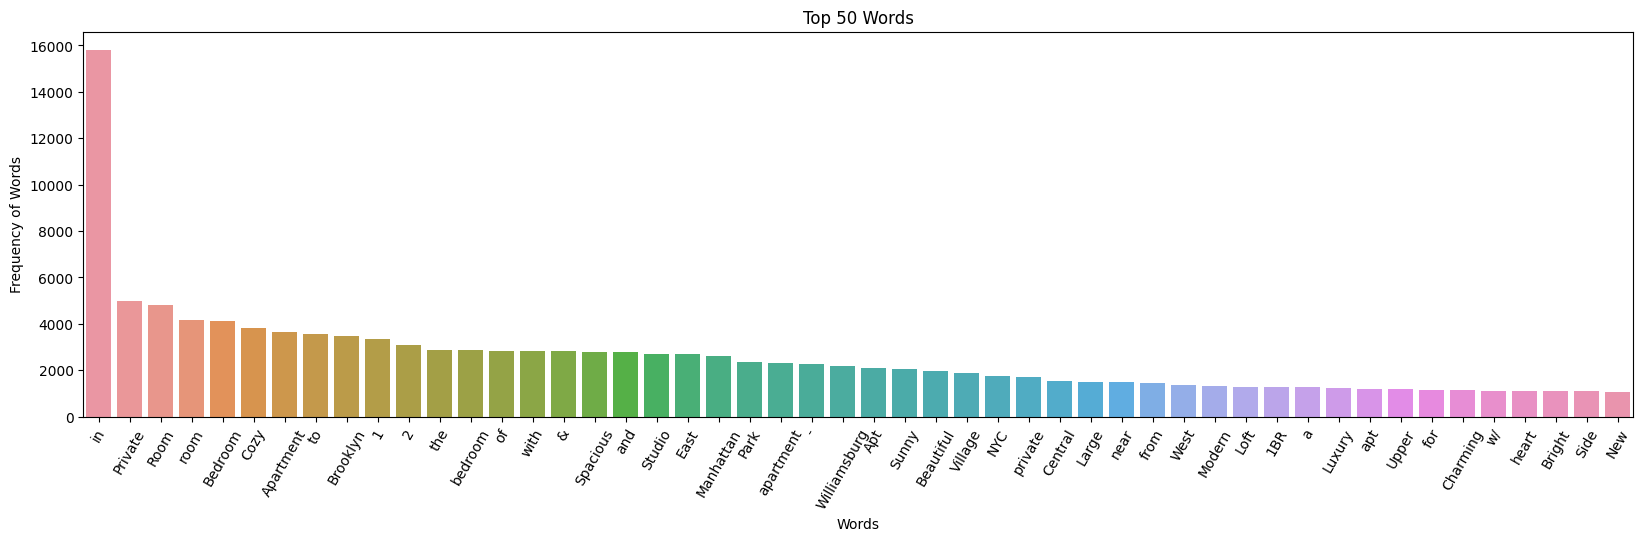

In [ ]:
# visualization
plt.figure(figsize=(20,5))
ax_1= sns.barplot(x='words',y='frequency',data = top_50_words)
ax_1.set_title('Top 50 Words')
ax_1.set_ylabel('Frequency of Words')
ax_1.set_xlabel('Words')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=60)
plt.show()

### Column #2 -----> host_name



In [ ]:
df['host_name'].nunique()

11452

### Column #3 -----> neighbourhood_group

In [ ]:
df['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [ ]:
df['neighbourhood_group'].nunique()

5

So there are 5 unique values in this column. Let's see what they are.

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

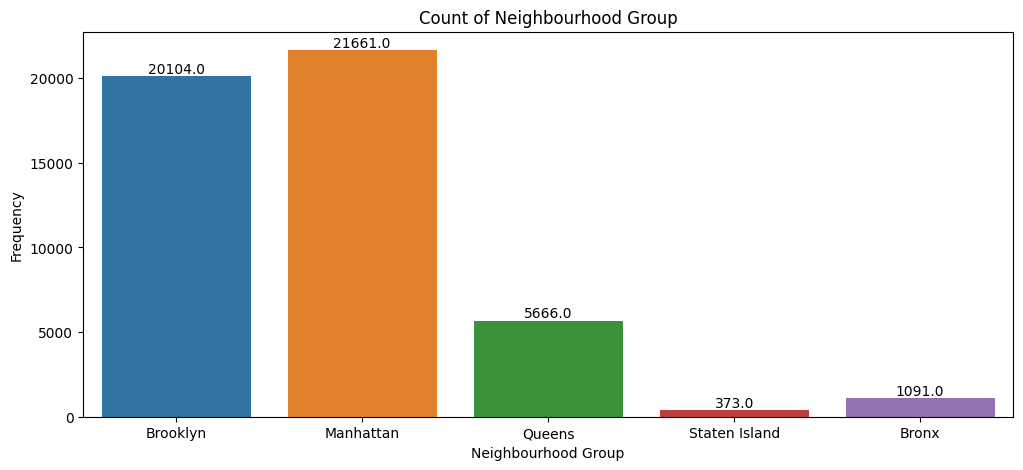

In [ ]:
#count_plot
plt.figure(figsize=(12,5))
ax_3 = sns.countplot(x='neighbourhood_group',data = df)
ax_3.set_title('Count of Neighbourhood Group')
ax_3.set_ylabel('Frequency')
ax_3.set_xlabel('Neighbourhood Group')

# Annoating the count plot----> To annotate we will Loop through the bars and add count labels.
for p in ax_3.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax_3.annotate(count, (x, y), ha='center', va='bottom')
plt.show()

### Observations
This plot shows that Manhattan has the highest number of listings followed by Brooklyn, Queens, Bronx and Staten Island respectively.

### Column #4 -----> neighbourhood


In [ ]:
neighbourhood_unique_values = df['neighbourhood'].value_counts()
neighbourhood_unique_values

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
#.most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_=Counter( df['neighbourhood']).most_common()
top_50_=top_50_[0:50]
top_50_[:20]

[('Williamsburg', 3920),
 ('Bedford-Stuyvesant', 3714),
 ('Harlem', 2658),
 ('Bushwick', 2465),
 ('Upper West Side', 1971),
 ("Hell's Kitchen", 1958),
 ('East Village', 1853),
 ('Upper East Side', 1798),
 ('Crown Heights', 1564),
 ('Midtown', 1545),
 ('East Harlem', 1117),
 ('Greenpoint', 1115),
 ('Chelsea', 1113),
 ('Lower East Side', 911),
 ('Astoria', 900),
 ('Washington Heights', 899),
 ('West Village', 768),
 ('Financial District', 744),
 ('Flatbush', 621),
 ('Clinton Hill', 572)]

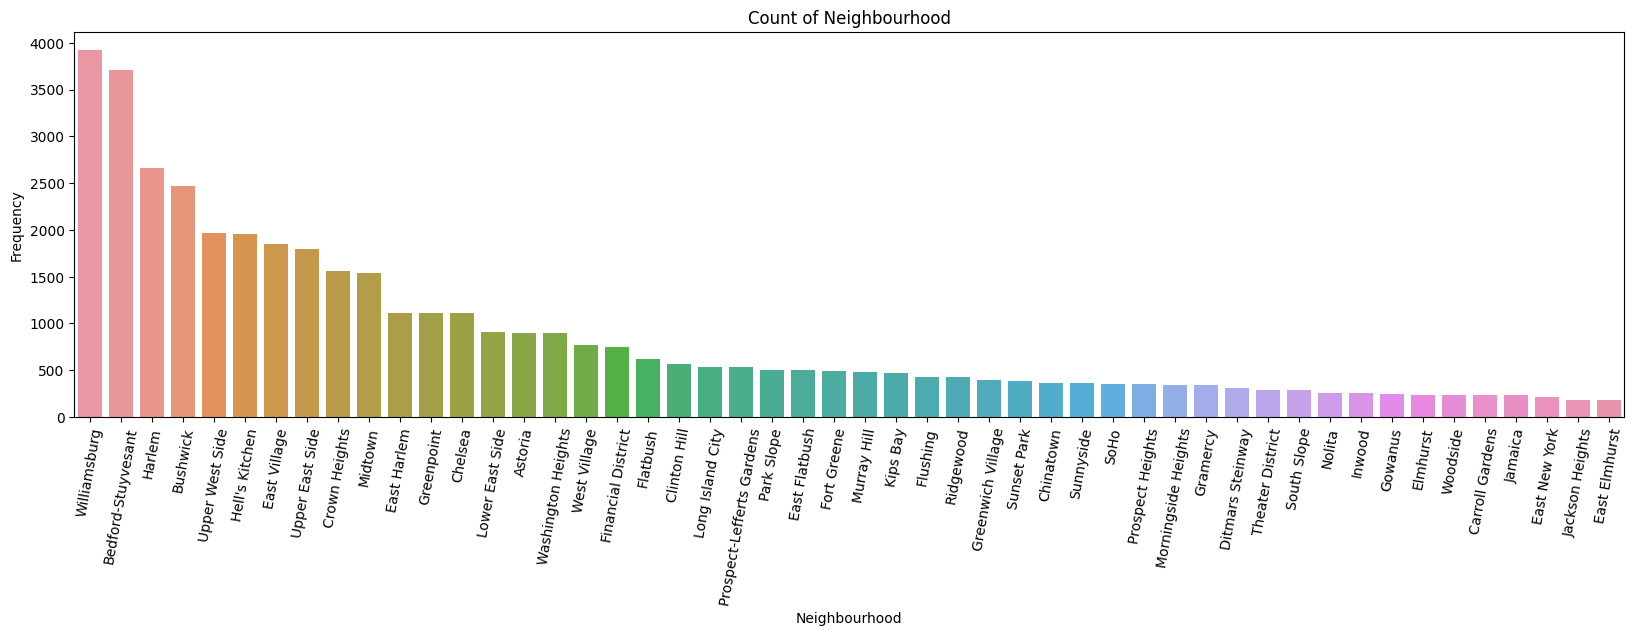

In [ ]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()

### Column #6&7 -----> latitude & longitude

In [ ]:
my_list = df['latitude']

# Sort the list in ascending order
sorted_list = sorted(my_list)

# Access the first and last element of the sorted list
first_element = sorted_list[0]
last_element = sorted_list[-1]

# Print the sorted list, first element, and last element
print("First Element:", first_element)
print("Last Element:", last_element)

First Element: 40.49979
Last Element: 40.91306


In [ ]:
my_list = df['longitude']

# Sort the list in ascending order
sorted_list = sorted(my_list)

# Access the first and last element of the sorted list
first_element = sorted_list[0]
last_element = sorted_list[-1]

# Print the sorted list, first element, and last element
print("First Element:", first_element)
print("Last Element:", last_element)

First Element: -74.24442
Last Element: -73.71299


### Let's see the distribution of latitude and longitude together through a Scatter Plot

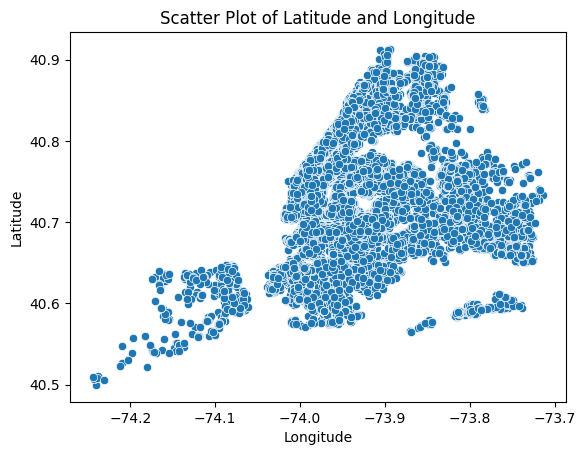

In [ ]:
# Create a scatter plot
sns.scatterplot(x = df['longitude'], y = df['latitude'])

# Set the title, x-axis label, and y-axis label
plt.title("Scatter Plot of Latitude and Longitude")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Column #8 -----> room_type

In [ ]:
df[['room_type']].nunique()

room_type    3
dtype: int64

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

We have 3 distinct types of rooms namely

1.Private room

2.Entire home/apt

3.Shared room

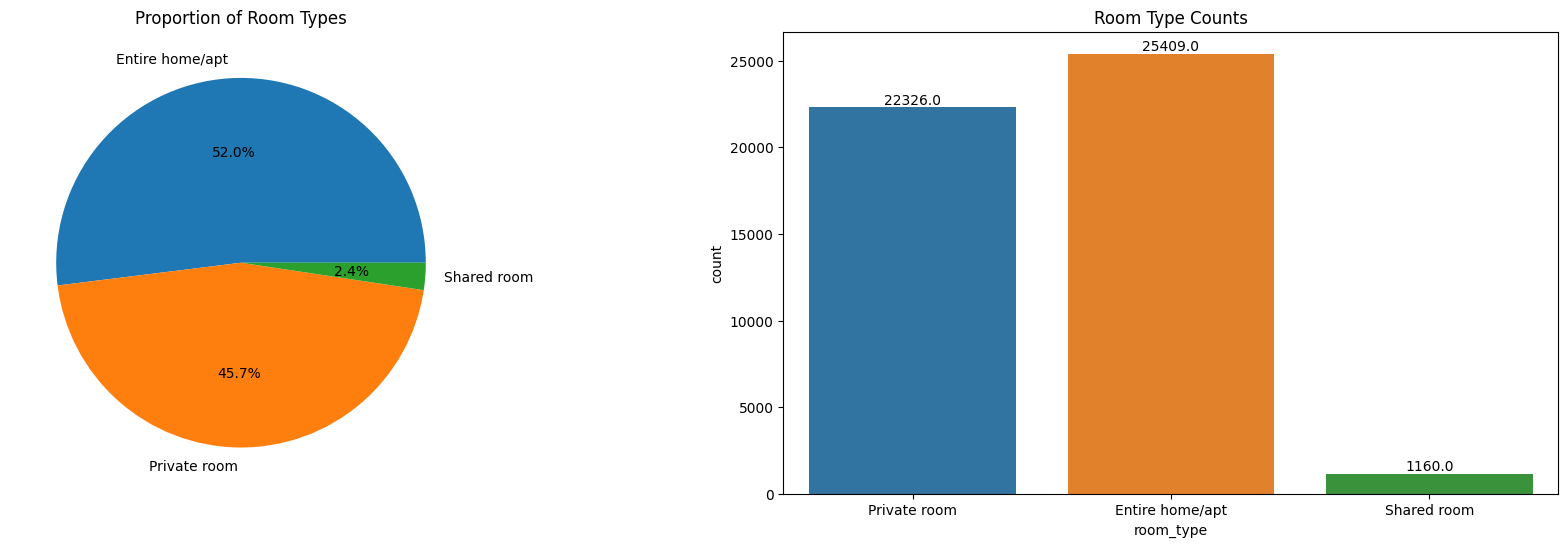

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6)) # creating a figure with two subplots side by side
ax = axes.flatten() # ax variable is used to create two axes objects for the two subplots using axes.flatten()

labels = df['room_type'].value_counts().index
sizes = df['room_type'].value_counts().values
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Proportion of Room Types')

sns.countplot(data=df, x='room_type', ax=ax[1])
ax[1].set_title('Room Type Counts')
# Annotating the count plot
for p in ax[1].patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax[1].annotate(count, (x, y), ha='center', va='bottom')


plt.show()

### Observations

We can infer from the above plots that most of the listings are for Entire home/apt followed by Private room and Shared room respectively.

### Column #9 -----> price

In [ ]:
df[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


### Checking for number unique listings

In [ ]:
print('There are a total of',df['price'].nunique(), 'unique listings in this column.' )

There are a total of 674 unique listings in this column.


### Checking the number of unique values more than mean

In [ ]:
# Calculate the mean of the data
mean_value = df['price'].mean()
# Extract data greater than or equal to the mean
greater_than_mean = df[df['price'] > mean_value]['price'].nunique()
greater_than_mean

532

The above analyisis on data shows that the price ranges from 0 to 10000.

The mean of the price column comes around 152.

There are 674 different prices listed for all the listings in NYC

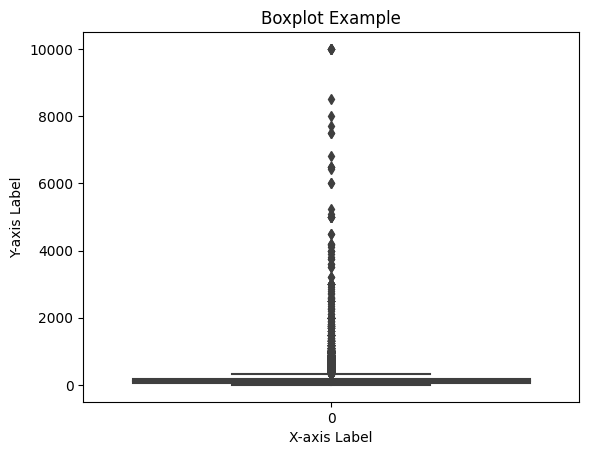

In [ ]:
# Create a boxplot using seaborn
sns.boxplot(df['price'])

# Set the title, x-axis label, and y-axis label
plt.title("Boxplot Example")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Show the plot
plt.show()

### Observations

The above plot shows us a large number of outliers

### Column #10 -----> minimum_nights

In [ ]:
df[['minimum_nights']].value_counts()

minimum_nights
1                 12720
2                 11696
3                  7999
30                 3760
4                  3303
                  ...  
182                   1
183                   1
184                   1
185                   1
1250                  1
Length: 109, dtype: int64

In [ ]:
df[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


<ipython-input-73-1bd39edacd15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.minimum_nights)


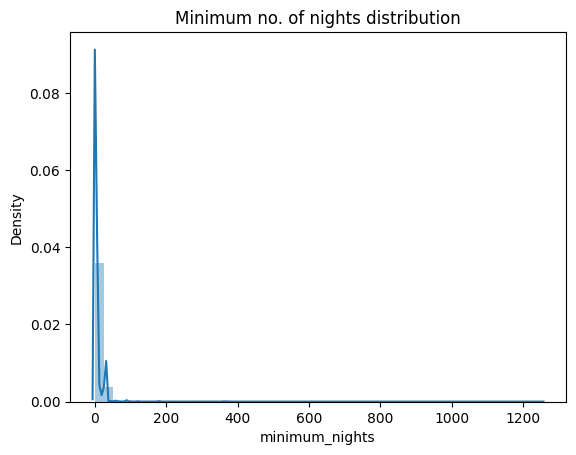

In [ ]:
ax = sns.distplot(df.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.show()

In [ ]:
#https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/#Log_Transformation
#https://seaborn.pydata.org/generated/seaborn.distplot.html
from scipy.stats import boxcox
# power transform
data_box_cox_transform = boxcox(df.minimum_nights)#lambda=0 it means log transform by defination of box-cox transform.

In [ ]:
data_box_cox_transform

(array([0.        , 0.        , 0.86162699, ..., 1.41767289, 0.        ,
        1.28379566]),
 -0.46182559978389276)

Text(0.5, 1.0, 'Minimum no.of nights distribution')

<Figure size 1000x500 with 0 Axes>

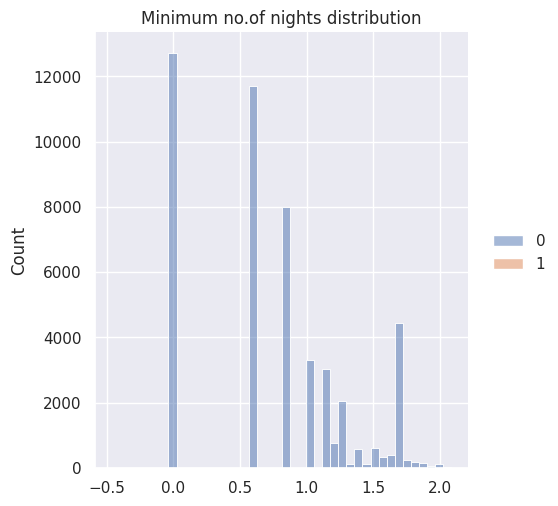

In [ ]:
#plot for box-cox transformed data.
sns.set_theme(); np.random.seed(0)
plt.figure(figsize=(10,5))

ax = sns.displot(data_box_cox_transform)

plt.title('Minimum no.of nights distribution')

In [ ]:
log_transfrom = np.log(df['minimum_nights'])

<ipython-input-78-6c29f8e6f181>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(log_transfrom)


Text(0.5, 1.0, 'Minimum no.of nights distribution')

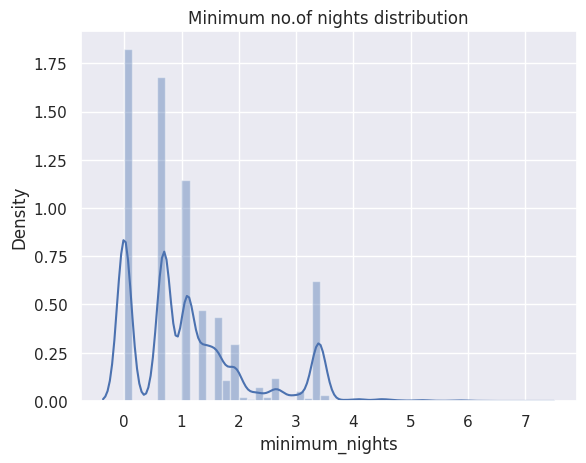

In [ ]:
ax = sns.distplot(log_transfrom)
plt.title('Minimum no.of nights distribution')

### Column #11 -----> number_of_reviews

In [ ]:
df[['number_of_reviews']].value_counts()

number_of_reviews
0                    10052
1                     5244
2                     3465
3                     2520
4                     1994
                     ...  
352                      1
351                      1
341                      1
340                      1
629                      1
Length: 394, dtype: int64

In [ ]:
df[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


<ipython-input-81-992dde1f26af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=df["number_of_reviews"])


Text(0.5, 1.0, 'number_of_reviews')

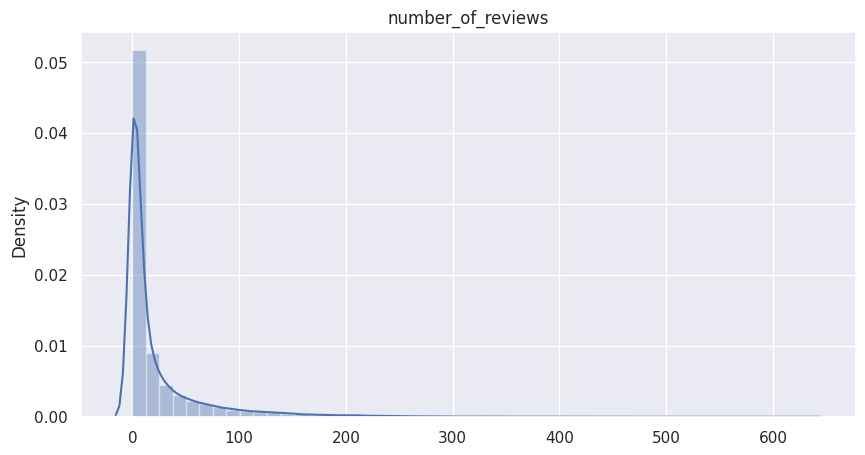

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(x=df["number_of_reviews"])
plt.title('number_of_reviews')

### Column #12 -----> last_review

In [ ]:
df[['last_review']]

,last_review
0,2018-10-19
1,2019-05-21
2,0
3,2019-07-05
4,2018-11-19
...,...
48890,0
48891,0
48892,0
48893,0


### Column #13 -----> reviews_per_month

In [ ]:
df[["reviews_per_month"]].describe()

,reviews_per_month
count,48895.000000
mean,1.090910
std,1.597283
min,0.000000
25%,0.040000
50%,0.370000
75%,1.580000
max,58.500000


### Column #15 -----> availability_365

In [ ]:
df[['availability_365']].value_counts()

availability_365
0                   17533
365                  1295
364                   491
1                     408
89                    361
                    ...  
195                    26
196                    24
183                    24
181                    23
202                    20
Length: 366, dtype: int64

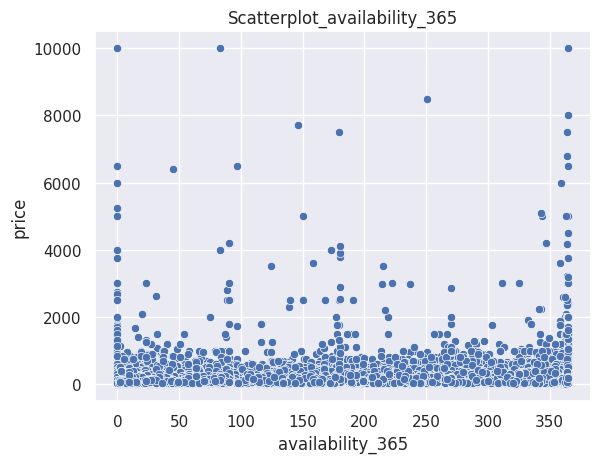

In [ ]:
ax = sns.scatterplot(data=df,x='availability_365',y='price')
plt.title("Scatterplot_availability_365")
plt.show()

# ***Multivariate Analysis***

## Correlation Plot

Let's check the correlation matrix to understand how are the features interrelated with each other.

Also to get an idea which are the most important features in this data.

<ipython-input-86-b466725dfd06>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), linewidths=0, vmin=-1, annot=True, cmap="coolwarm")


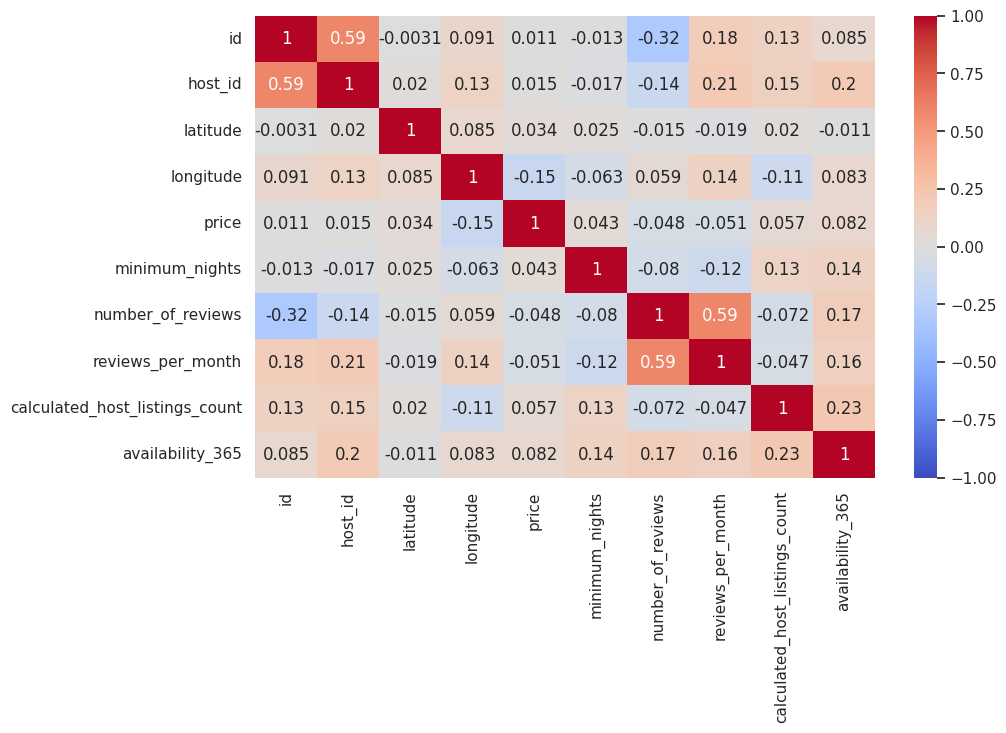

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), linewidths=0, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

### Observations

1. The columns host_id and id are highly corelated
2. The columns number_of_reviews and reviews_per_month are highly corelated

## Relationship between Price and Room Type.

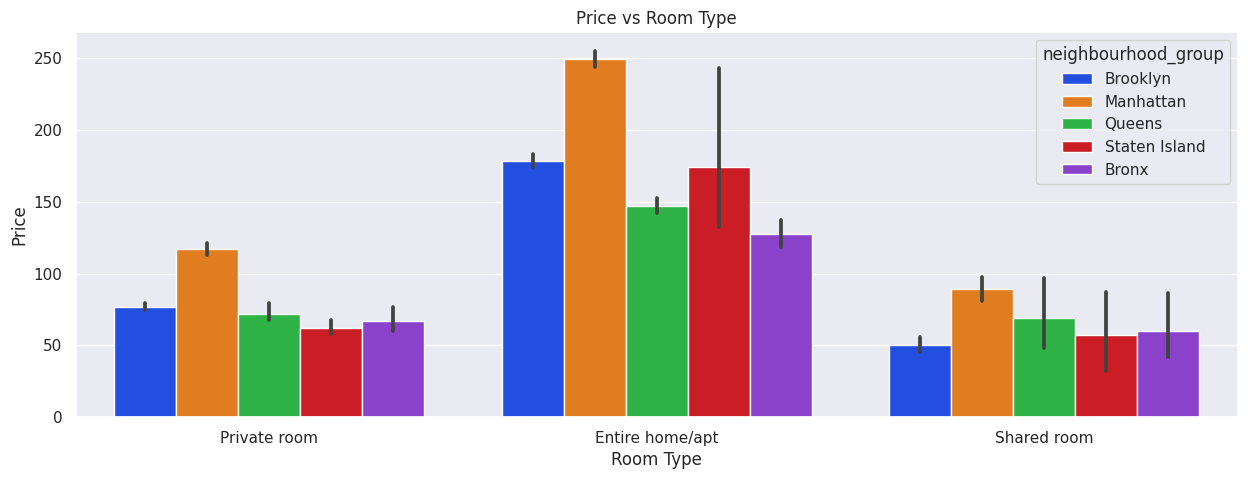

In [ ]:
# Create a figure and axis
plt.figure(figsize = (15,5))

# Create a scatter plot using seaborn
sns.barplot(y= 'price', x= 'room_type',data=df,hue='neighbourhood_group', palette='bright')

# Set the title, x-axis label, and y-axis label
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel("Price")

# Show the plot
plt.show()

### Observations

1. Most of the rooms lie with-in the price range of 250$

2. Manhattan leads the Price in each room type.

3. Entire home/apt has the highest price followed by Private room then shared room, point to note that some shared rooms in Manhattan are priced more than the Private room in other neighbourhood group.

## Let's see count of Room Types with Neighbourhood Group

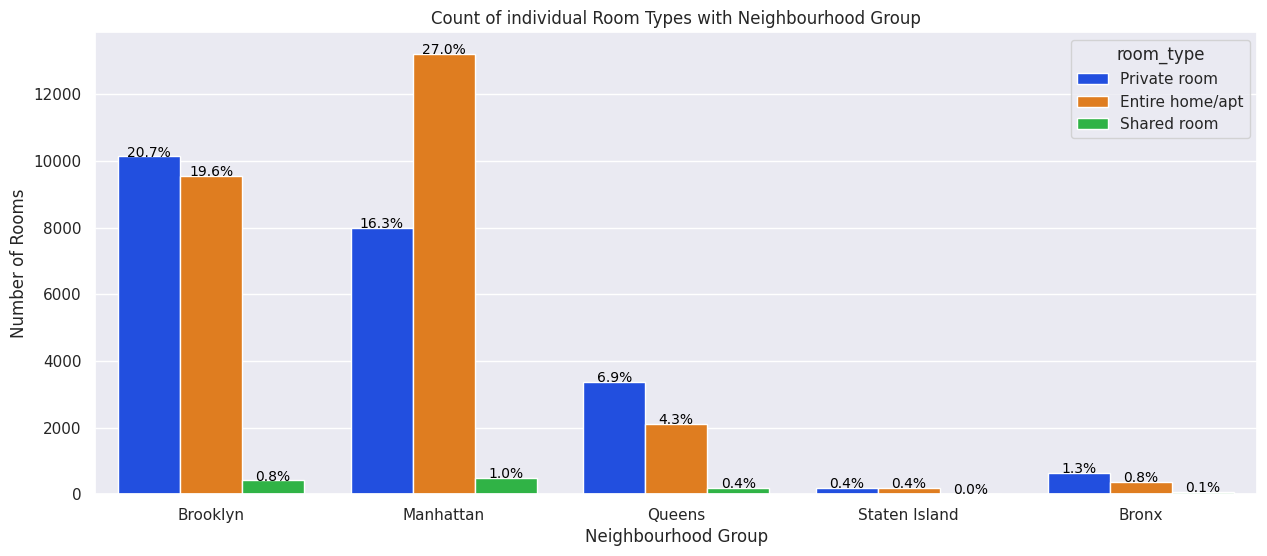

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.05
        ax.annotate(percentage, (x, y), fontsize=10, color='black', ha='center')

plt.title('Count of individual Room Types with Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Rooms')

plt.show()

### Observations

1. Out of all the listings Manhattan has the most i.e. 44.3%, closely followed by Brooklyn with 41.1% , 11.6% are in Queens, 2.1% in Bronx and 0.8% in Staten Island.

2. Manhattan has the more listings for Entire Home/apt than Private Room, which is contrary to the other boroughs where Private Rooms are listed more than Entire Home/apt.

3. Majority of listings are for Entire Home/apt i.e. 52.1%, followed by Private Room i.e. 45.6% and Shared Rooms have least number of listings < 2.5%.

## Let's see the Relation between Availability 365 and Neighbourhood Group on the basis of Room Type

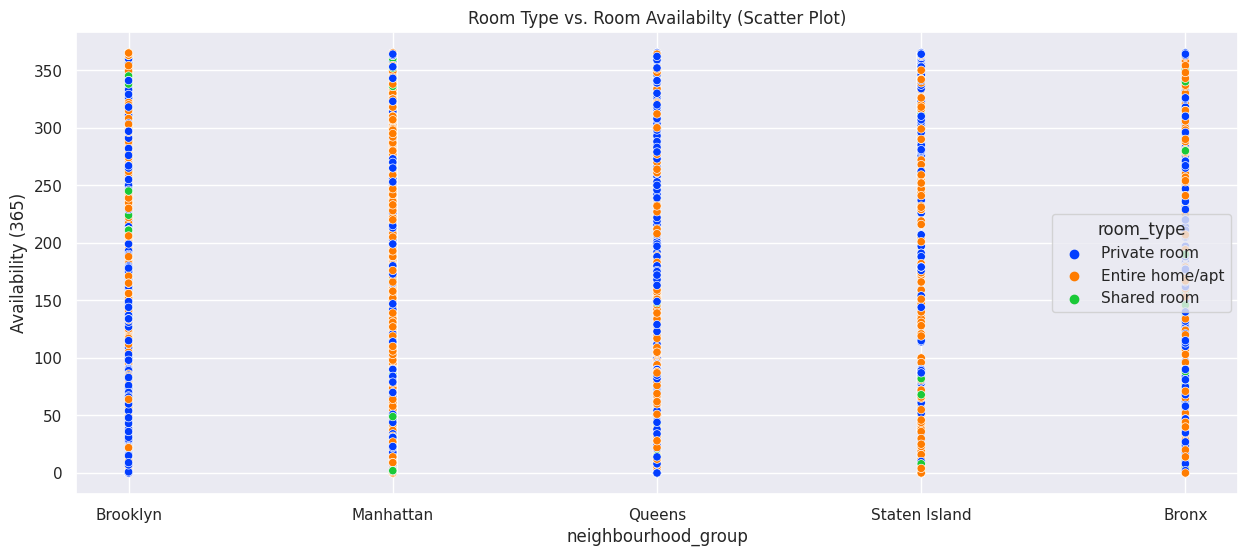

In [ ]:
# Create a figure and axis
f, ax = plt.subplots(figsize=(15, 6))

# Create a scatter plot using seaborn
sns.scatterplot(x='neighbourhood_group', y='availability_365', data=df,hue='room_type', ax=ax, palette="bright")

# Set the title, x-axis label, and y-axis label
plt.title("Room Type vs. Room Availabilty (Scatter Plot)")
plt.xlabel('neighbourhood_group')
plt.ylabel('Availability (365)')

# Show the plot
plt.show()

### Observations

1. If you are looking for Private rooms for 150 days or less then Broolyn seems to be the best option with the maximum listings for the room category in the duration, but for 150-250 days you are more likely to find Entire Home/apt and some Shared rooms.

2. Majority of Entire Home/apt in Manhattan are available for 100 days or more with some listings for Private rooms too.

3. In Queens if you are looking for listings with 150 days or more it's highly likely that you will find a Private Room.




## We have some geo-spatial data let's try to get some insight from it

### We can see the listing on the basis of co-ordiante

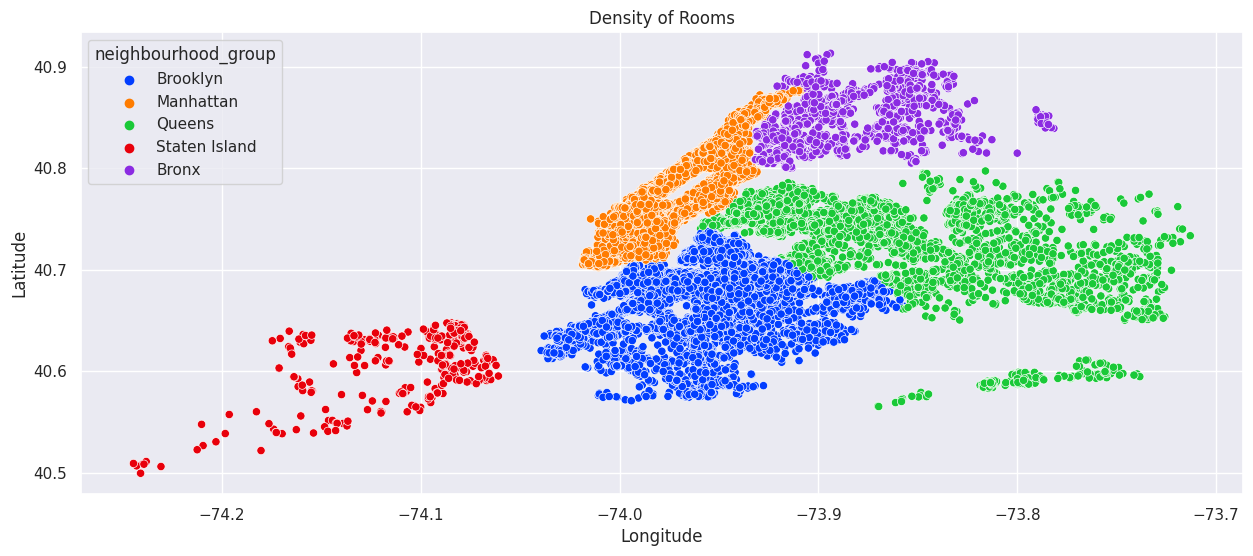

In [ ]:
plt.figure(figsize=(15, 6))
ax_5 = sns.scatterplot(x=df.longitude,y=df.latitude,hue = df.neighbourhood_group,palette='bright')
ax_5.set_title('Density of Rooms')
ax_5.set_ylabel('Latitude')
ax_5.set_xlabel('Longitude')
#ax_5.grid(visible=False) # To remove the grid lines
plt.show()

### Observation

1. It seems that Manhattan has the most number of listings per square Kilometer and Staten Island has the least.

2. More than 75% of listings lie between latitude 40.6 to 40.9 and longitude   -74.1 to -73.9.

### Individual Room Type along with latitude and longitude.

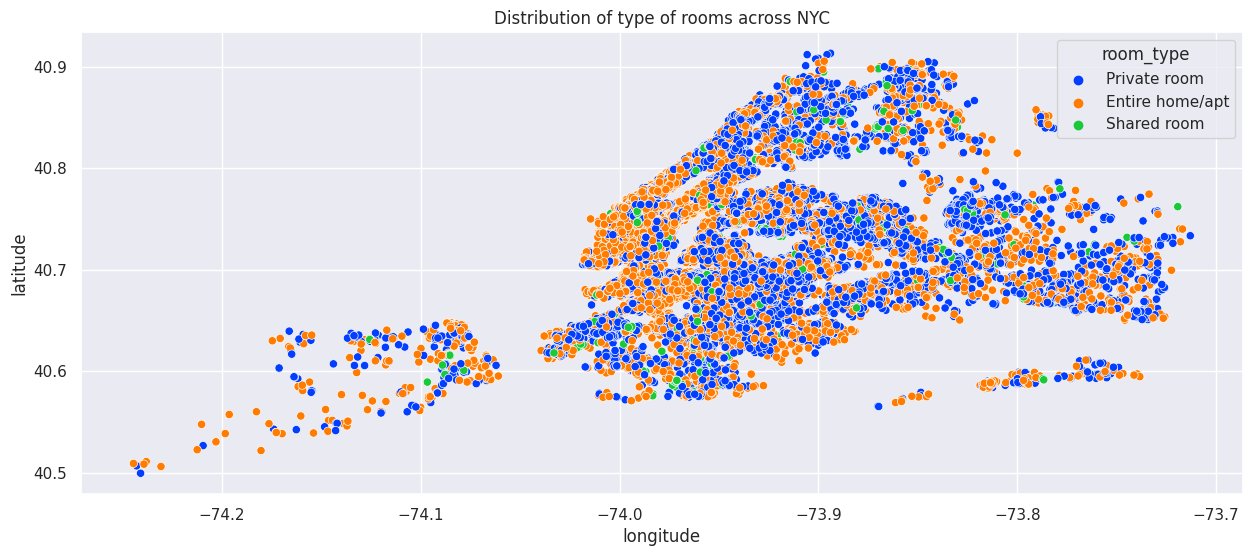

In [ ]:
sns.set(rc={"figure.figsize": (15, 6)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='bright')
ax.set_title('Distribution of type of rooms across NYC')
plt.show()

### Observations

1. Majority of the Entire home/apt are listed around -74.0 Longitude.

2. Although Manhattan stretches from 40.7-40.9 Latitude, most of the Entire home/apt listed in Manhattan are in 40.7-40.8 Latitude i.e. South-Western part which makes it the costliest Neighbourhood group to stay in entire NYC.

3. In Brooklyn most of the Entire home/apt listed are in western part close to Manhattan.

## Neighbourhood Group and Room Availability

Let's try to get some insights from these two columns

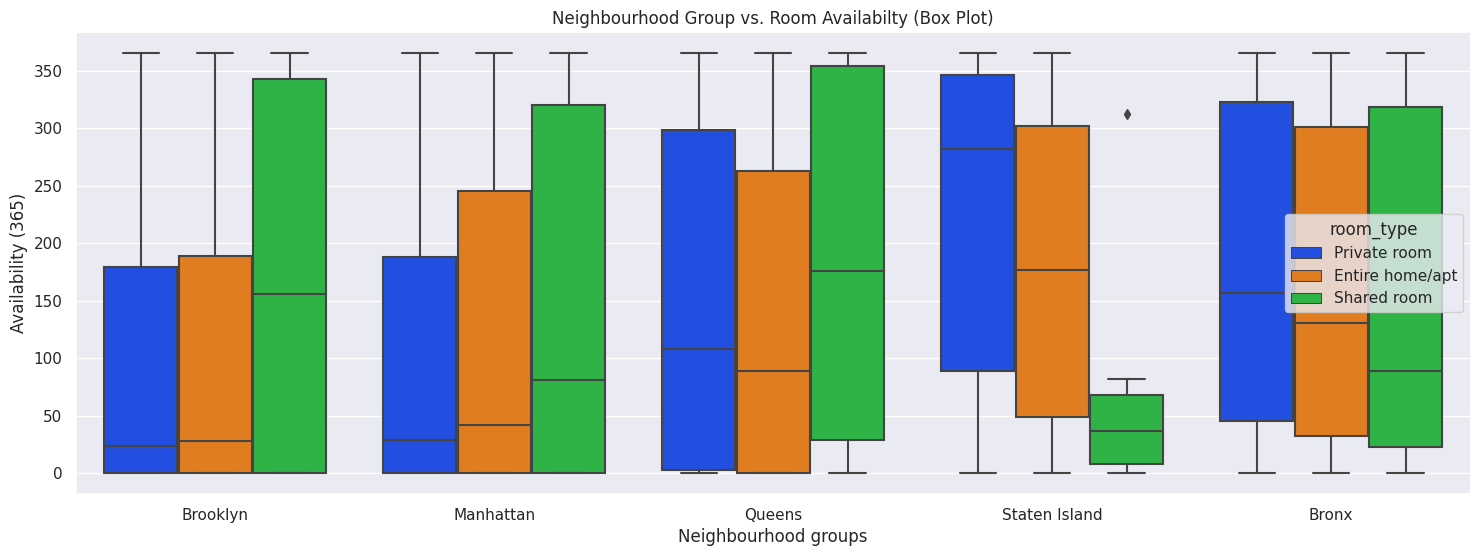

In [ ]:
# Create a figure and axis
f, ax = plt.subplots(figsize=(18, 6))

# Create a violin plot using seaborn
sns.boxplot(x='neighbourhood_group', y='availability_365',data = df, hue = 'room_type', ax=ax, palette="bright")



# Set the title, x-axis label, and y-axis label
plt.title("Neighbourhood Group vs. Room Availabilty (Box Plot)")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability (365)')

# Show the plot
plt.show()

Let's see what the median values for each room type are

In [ ]:
# Calculate median values for each combination of neighbourhood group and room type
medians = df.groupby(['neighbourhood_group', 'room_type'])['availability_365'].median().reset_index()

print(medians)

   neighbourhood_group        room_type  availability_365
0                Bronx  Entire home/apt             131.0
1                Bronx     Private room             157.0
2                Bronx      Shared room              89.0
3             Brooklyn  Entire home/apt              28.0
4             Brooklyn     Private room              24.0
5             Brooklyn      Shared room             156.0
6            Manhattan  Entire home/apt              42.0
7            Manhattan     Private room              29.0
8            Manhattan      Shared room              81.0
9               Queens  Entire home/apt              89.0
10              Queens     Private room             108.0
11              Queens      Shared room             175.5
12       Staten Island  Entire home/apt             176.5
13       Staten Island     Private room             282.0
14       Staten Island      Shared room              37.0


### Observations

1. In Brooklyn Entire Home/apt and Private rooms are listed for 365 days but 50% of them are listed for or less than 28 and 24 days respectively and a Shared room for 156 days or less.

2. In Manhattan 50% of Entire Home/apt and Private rooms are listed for or less than 42 and 29 days respectively and you can find 50% of Shared rooms for 81 days or less.

3. In Queens 50% of listings for shared rooms are 175 days or less which is the maximum for the category.

4. Staten Island has the highest median value for Entire Home/apt and Private rooms i.e. 176 and 282 days respectively.


## Neighbourhood group and Price on the basis of Room Type

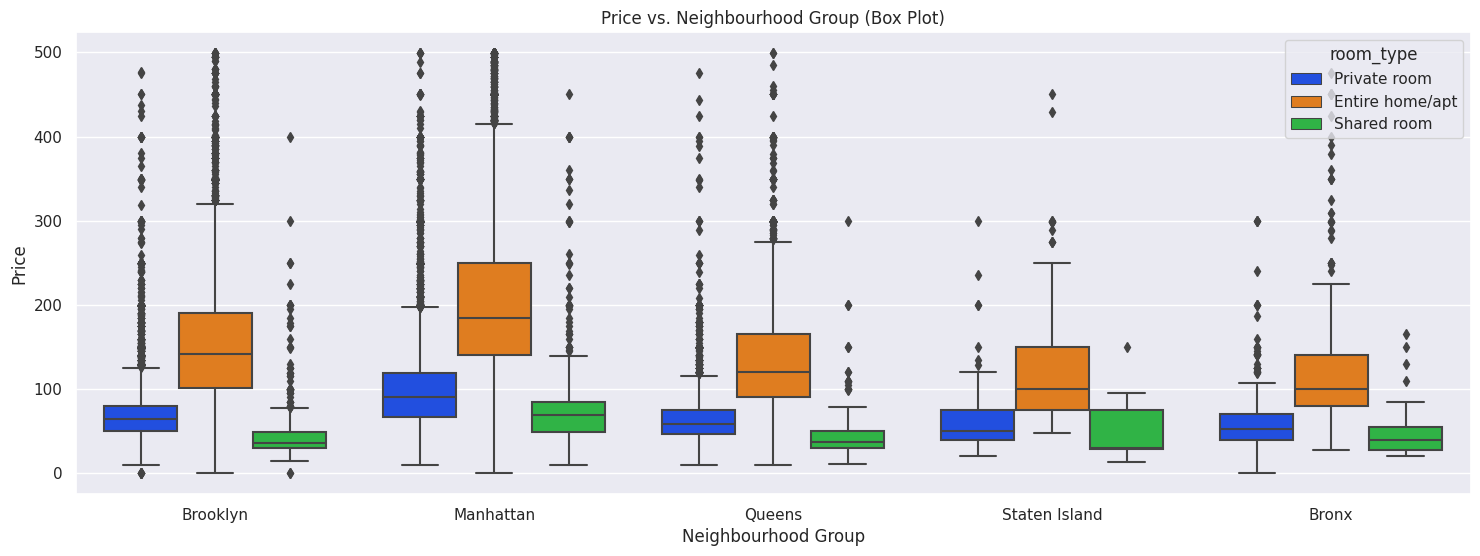

In [ ]:
# Create a figure and axis
f, ax = plt.subplots(figsize=(18, 6))

# We will set
adjusted_price = df[df.price <500]

# Create a violin plot using seaborn
sns.boxplot(x='neighbourhood_group', y='price', data=adjusted_price, hue='room_type',ax=ax, palette="bright")

# Set the title, x-axis label, and y-axis label
plt.title("Price vs. Neighbourhood Group (Box Plot)")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Show the plot
plt.show()

In [ ]:
# Calculate median values for each combination of neighbourhood group and room type
medians = adjusted_price.groupby(['neighbourhood_group', 'room_type'])['price'].median().reset_index()

print(medians)

   neighbourhood_group        room_type  price
0                Bronx  Entire home/apt  100.0
1                Bronx     Private room   53.0
2                Bronx      Shared room   40.0
3             Brooklyn  Entire home/apt  142.0
4             Brooklyn     Private room   64.0
5             Brooklyn      Shared room   36.0
6            Manhattan  Entire home/apt  185.0
7            Manhattan     Private room   90.0
8            Manhattan      Shared room   69.0
9               Queens  Entire home/apt  120.0
10              Queens     Private room   59.0
11              Queens      Shared room   37.0
12       Staten Island  Entire home/apt  100.0
13       Staten Island     Private room   50.0
14       Staten Island      Shared room   30.0


### Observations

1. The least median price for Entire Home/apt in NYC is 100 in Bronx and Staten Island and highest median price is 185$ in Manhattan.

2. The median price for Private room is also the highest in Manhattan at 90$.

3. Bronx, Queens and Staten Island have nearly the same price range for all room category.

In [ ]:
# Calculate mean values for each combination of neighbourhood group and room type
means = adjusted_price.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()

print(means)

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  121.480000
1                Bronx     Private room   60.595679
2                Bronx      Shared room   47.254237
3             Brooklyn  Entire home/apt  158.278928
4             Brooklyn     Private room   71.113402
5             Brooklyn      Shared room   48.890777
6            Manhattan  Entire home/apt  201.285680
7            Manhattan     Private room  102.435092
8            Manhattan      Shared room   82.334737
9               Queens  Entire home/apt  137.880367
10              Queens     Private room   66.892061
11              Queens      Shared room   46.989691
12       Staten Island  Entire home/apt  124.835294
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


### Observations

1. The median and mean price difference for Entire Home/apt in all neighbourhood group is between 8% to 25% with the least difference in Manhattan and most in Staten Island.

2. The median and mean price difference for Private Room is highest in Manhattan i.e. 12 USD and in rest of the neighbourhood group the difference is around 7 USD.

3. The median and mean price difference for Shared Room is highest at Staten Island i.e 27$.

## Let's find out how staying at different locations is going to impact your Budget.

### We will try to see the most expensive and affordable neighbourhoods in accordance with the listed price.

Let's print a list of some of the most expensive neighbourhoods.

In [ ]:
# Group the dataframe by 'neighbourhood' and 'neighbourhood_group' and calculate the mean of 'price'
neighbourhood_group_mean_price = df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean()

# Sort the mean prices in descending order and select the top 10 costliest neighborhoods
top_10_costliest_neighbourhoods = neighbourhood_group_mean_price.sort_values(ascending=False).head(25)

# Print the top 10 costliest neighborhoods with their respective neighborhood group
print(top_10_costliest_neighbourhoods)

neighbourhood       neighbourhood_group
Fort Wadsworth      Staten Island          800.000000
Woodrow             Staten Island          700.000000
Tribeca             Manhattan              490.638418
Sea Gate            Brooklyn               487.857143
Riverdale           Bronx                  442.090909
Prince's Bay        Staten Island          409.500000
Battery Park City   Manhattan              367.557143
Flatiron District   Manhattan              341.925000
Randall Manor       Staten Island          336.000000
NoHo                Manhattan              295.717949
SoHo                Manhattan              287.103352
Midtown             Manhattan              282.719094
Neponsit            Queens                 274.666667
West Village        Manhattan              267.682292
Greenwich Village   Manhattan              263.405612
Chelsea             Manhattan              249.738544
Willowbrook         Staten Island          249.000000
Theater District    Manhattan             

We can also visualize the top 10 neighbourhood by Latitude and Longitude with their respective neighbourhood group.

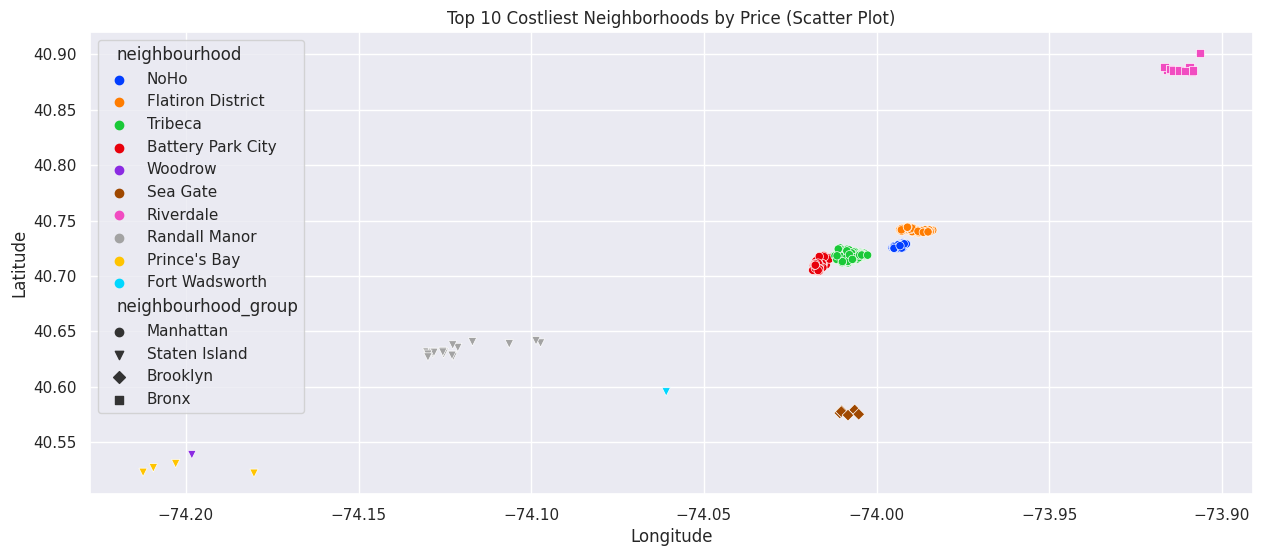

In [ ]:
# Sort the neighborhoods based on average price in descending order
top_10_costliest_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

# Filter the dataframe to include only the top 10 costliest neighborhoods
df_top_10_costliest_neighborhoods = df[df['neighbourhood'].isin(top_10_costliest_neighborhoods.index)]

# markers
marker_symbols=['o','v','D','s']

# Create the scatter plot with latitude and longitude as x and y respectively
sns.scatterplot(x='longitude', y='latitude', data=df_top_10_costliest_neighborhoods, hue='neighbourhood', style = 'neighbourhood_group', markers=marker_symbols, palette='bright')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Costliest Neighborhoods by Price (Scatter Plot)')
plt.show()

### Observations

1. Fort Wardsworth along with Woodrow in Staten Island comes as a surpise with the top 2 costliest neighbourhood with mean price at 800 USD and 700 USD respectively.

2. Tribeca from Manhattan is the third costliest neighbourhood and surprisingly it's mean price is 310 USD less than Ford Wardsworth.

3. Queens have no neighbourhood in 10 costliest neighbourhoods.

4. Riverdale from Bronx and Sea Gate from Brooklyn is the only neighbourhood in 10 costliest neighbourhoods.

5. The top 25 most costliest list is dominated by Staten Island and Manhattan

Let's print a list of most affordable neighbourhoods too.

In [ ]:
# Group the dataframe by 'neighbourhood' and 'neighbourhood_group' and calculate the mean of 'price'
neighbourhood_group_mean_price = df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean()

# Sort the mean prices in descending order and select the top 10 costliest neighborhoods
top_10_costliest_neighbourhoods = neighbourhood_group_mean_price.sort_values(ascending=False).tail(25)

# Print the top 10 costliest neighborhoods with their respective neighborhood group
print(top_10_costliest_neighbourhoods)

neighbourhood       neighbourhood_group
Silver Lake         Staten Island          70.000000
University Heights  Bronx                  69.571429
Fordham             Bronx                  69.444444
Morris Park         Bronx                  69.333333
Schuylerville       Bronx                  69.230769
Parkchester         Bronx                  69.076923
Graniteville        Staten Island          68.666667
Emerson Hill        Staten Island          68.200000
Arden Heights       Staten Island          67.250000
Woodhaven           Queens                 67.170455
Olinville           Bronx                  64.000000
Borough Park        Brooklyn               63.066176
Castle Hill         Bronx                  63.000000
Woodlawn            Bronx                  60.090909
Corona              Queens                 59.171875
Mount Eden          Bronx                  58.500000
Concord             Staten Island          58.192308
Grant City          Staten Island          57.666667
New Do

Lets's visualize the same on scatter plot.

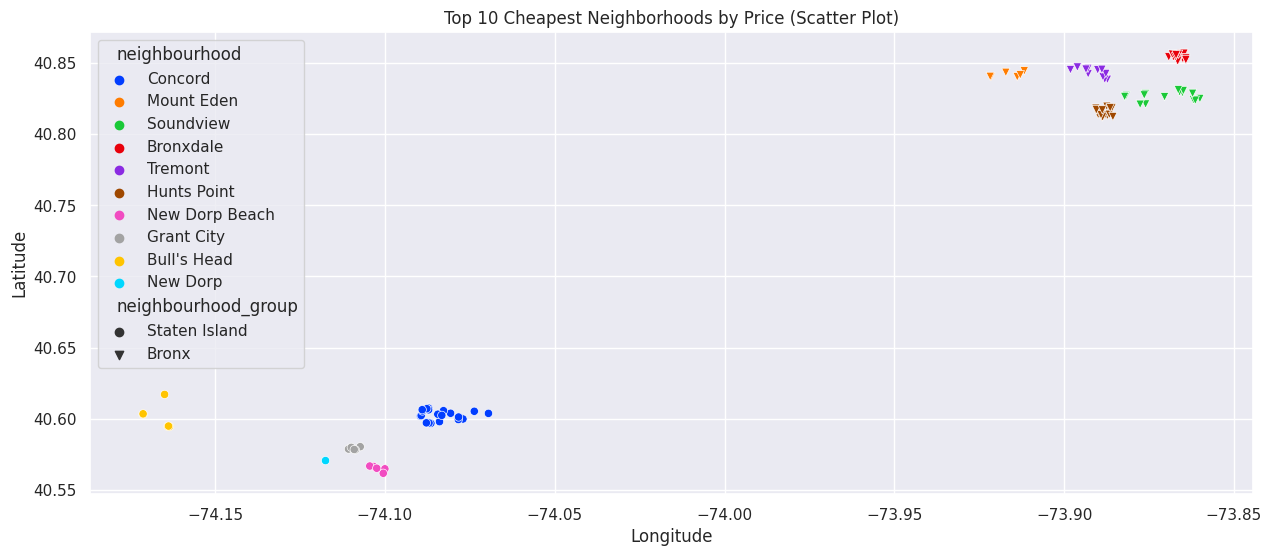

In [ ]:
# Sort the neighborhoods based on average price in ascending order
top_10_cheapest_neighborhoods = df.groupby('neighbourhood')['price'].mean().nsmallest(10)

# Extract the neighborhood names
cheapest_neighborhoods = top_10_cheapest_neighborhoods.index

# Filter the dataframe to include only the top 10 cheapest neighborhoods
df_top_10_cheapest_neighborhoods = df[df['neighbourhood'].isin(top_10_cheapest_neighborhoods.index)]

# markers
marker_symbols=['o','v']

# Create the scatter plot with latitude and longitude as x and y respectively
sns.scatterplot(x='longitude', y='latitude', data=df_top_10_cheapest_neighborhoods, hue='neighbourhood', style = 'neighbourhood_group', markers=marker_symbols, palette='bright')

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Cheapest Neighborhoods by Price (Scatter Plot)')
plt.show()

### Observations

1. No neighbourhood from Manhattan makes it to 25 most affordable neighbourhood , thus making it the least budget friendly location.

2. Bronx and Staten Island have most affordable neighbourhoods.

3. Borough Park in Brooklyn is the only place to get a spot in most affordable neighbourhood listed.

4. Corona and Woodhaven are most affordable neighbourhoods in Queens.

### We will try to see the most expensive and affordable places in accordance with the listed price.

Let's find out the 100 most Expensive Listings

In [ ]:
# Sort the dataframe by price in descending order and select the top 100 costliest listings
top_100_costliest_listings = df.sort_values('price', ascending=False).head(100)

# Select only the columns 'neighbourhood_group', 'host_id', and 'price'
top_100_costliest_listings = top_100_costliest_listings[['host_name','price','neighbourhood_group', 'neighbourhood','room_type' ]]

# Print the top 100 costliest listings
print(top_100_costliest_listings)

      host_name  price neighbourhood_group       neighbourhood  \
9151   Kathrine  10000              Queens             Astoria   
17692      Erin  10000            Brooklyn          Greenpoint   
29238    Jelena  10000           Manhattan     Upper West Side   
40433      Matt   9999           Manhattan     Lower East Side   
12342       Amy   9999           Manhattan     Lower East Side   
...         ...    ...                 ...                 ...   
5942       Jose   2000           Manhattan   Flatiron District   
11021     David   2000           Manhattan    Theater District   
19270     Henry   2000           Manhattan             Midtown   
6715      Kelly   2000            Brooklyn  Bedford-Stuyvesant   
19474      Sean   2000            Brooklyn            Bushwick   

             room_type  
9151      Private room  
17692  Entire home/apt  
29238  Entire home/apt  
40433  Entire home/apt  
12342     Private room  
...                ...  
5942   Entire home/apt  
11021  

Visualizing the most Expensive listings on a scatter plot with Geo-spatial Data.

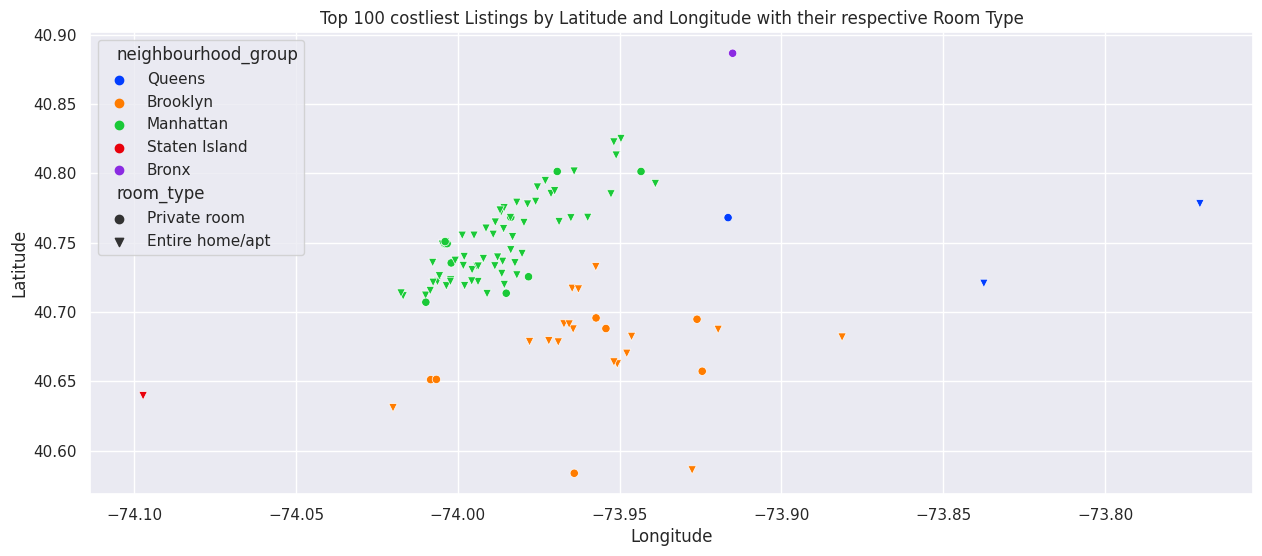

In [ ]:
# Sort the dataframe by price in ascending order and select the top 100 costliest listings
top_100_costliest_listings = df.sort_values('price', ascending=False).head(100)

# Extract the neighborhood names
costliest_listings = top_100_costliest_listings.index

# Filter the dataframe to include only the top 100 costliest neighborhoods
df_top_100_costliest_listings = df[df['neighbourhood'].isin(top_100_costliest_listings.index)]

# Markers
marker_symbols = ['o', 'v']

# Create a scatter plot of latitude vs longitude for the top 10 costliest listings
sns.scatterplot(x='longitude', y='latitude', data=top_100_costliest_listings, hue = 'neighbourhood_group', style = 'room_type', markers=marker_symbols, palette='bright')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 100 costliest Listings by Latitude and Longitude with their respective Room Type')
plt.show()

### Observations

1. The costliest listing in whole NYC is in Queens for a Private Room at 10000 USD which very surprising.

2. Manhattan has the most listing as expected, followed by Brooklyn.

3. Bronx and Staten Island has one listing each in the list for Private Room and Entire Home/apt respectively.

Finding the 100 most affordable listings

In [ ]:
# Sort the dataframe by price in descending order and select the top 100 costliest listings
top_100_cheapest_listings = df.sort_values('price').head(100)

# We can set multiple columns to print by selectin only the columns 'neighbourhood_group', 'host_id', and 'price'
top_100_cheapest_listings = top_100_cheapest_listings[['price','neighbourhood_group', 'neighbourhood','room_type' ]]

# Print the top 100 costliest listings
print((top_100_cheapest_listings))

       price neighbourhood_group       neighbourhood        room_type
25796      0            Brooklyn  Bedford-Stuyvesant     Private room
25634      0            Brooklyn            Bushwick     Private room
25433      0               Bronx     East Morrisania     Private room
25753      0            Brooklyn          Greenpoint     Private room
23161      0            Brooklyn  Bedford-Stuyvesant     Private room
...      ...                 ...                 ...              ...
28517     22            Brooklyn            Flatbush  Entire home/apt
20779     22            Brooklyn           Bay Ridge      Shared room
34153     22       Staten Island       Randall Manor     Private room
21209     22            Brooklyn       East Flatbush      Shared room
22050     22              Queens            Rosedale     Private room

[100 rows x 4 columns]


Visualizing the most affordable listings on the scatter plot

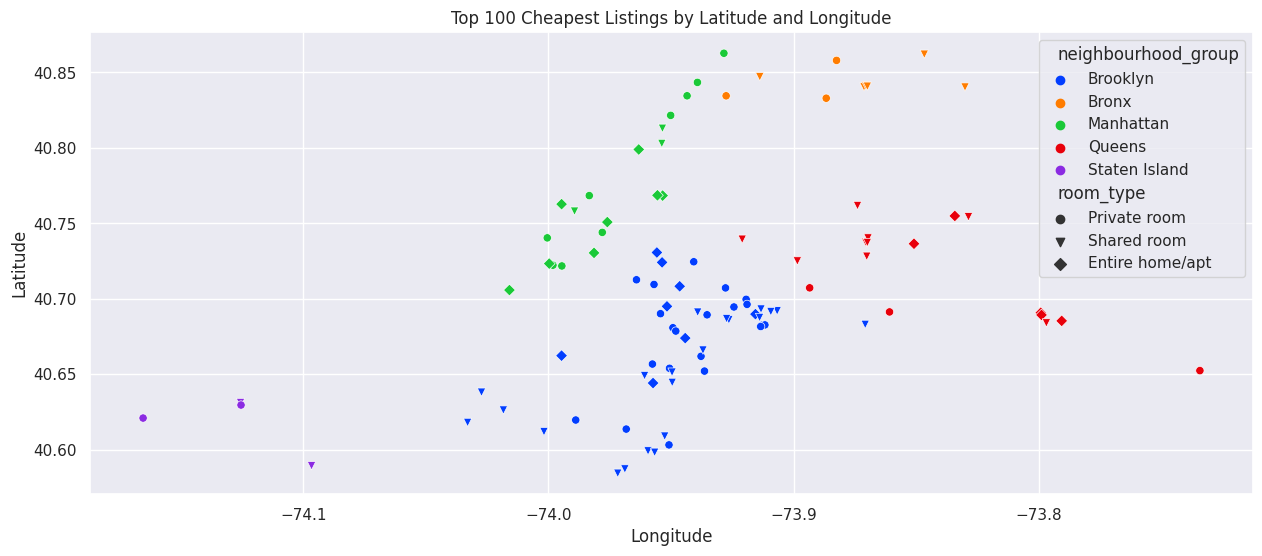

In [ ]:
# Sort the dataframe by price in ascending order and select the top 100 cheapest listings
top_100_cheapest_listings = df.sort_values('price').head(100)

# Extract the neighborhood names
cheapest_listings = top_100_cheapest_listings.index

# Filter the dataframe to include only the top 100 cheapest neighborhoods
df_top_100_cheapest_listings = df[df['neighbourhood'].isin(top_100_cheapest_listings.index)]

# Markers
marker_symbols = ['o', 'v', 'D']

# Create a scatter plot of latitude vs longitude for the top 100 cheapest listings
sns.scatterplot(x='longitude', y='latitude', data=top_100_cheapest_listings, hue = 'neighbourhood_group', style = 'room_type', markers=marker_symbols, palette='bright')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 100 Cheapest Listings by Latitude and Longitude')
plt.show()

### Observations

1. The most affordable list is dominated by Shared Rooms category.

2. This shows that one can get an Entire Home/apt or Private room too in the price of a Shared Room.

3. For some reason in Brooklyn there are listings available for 0 USD.

## Now we will try to see which listings can generate maximum revenvue

Let's see a list of top 100 revenue generators

In [ ]:
# Multiply the "price" and "minimum_nights" columns and store the result in a new column "revenue_generated"
df['revenue_generated'] = df['price'] * df['minimum_nights']

# Sort the dataframe by the "revenue_generated" column in descending order
df = df.sort_values(by='revenue_generated', ascending=False)

# Display the top 100 revenue generators
top_100_revenue_generators = df[['host_name', 'neighbourhood_group','neighbourhood','room_type','minimum_nights','revenue_generated']].head(10)
print(top_100_revenue_generators)

      host_name neighbourhood_group       neighbourhood        room_type  \
48043     Jenny           Manhattan             Tribeca  Entire home/apt   
9151   Kathrine              Queens             Astoria     Private room   
12342       Amy           Manhattan     Lower East Side     Private room   
17811     Iveta              Queens        Forest Hills  Entire home/apt   
44429    Noelle              Queens             Astoria     Private room   
43670   Jeffrey            Brooklyn  Bedford-Stuyvesant     Private room   
2854      Peter           Manhattan   Battery Park City  Entire home/apt   
13788      Mark            Brooklyn        Williamsburg     Private room   
38220      Adam           Manhattan        East Village     Private room   
29238    Jelena           Manhattan     Upper West Side  Entire home/apt   

       minimum_nights  revenue_generated  
48043             180            1170000  
9151              100            1000000  
12342              99             

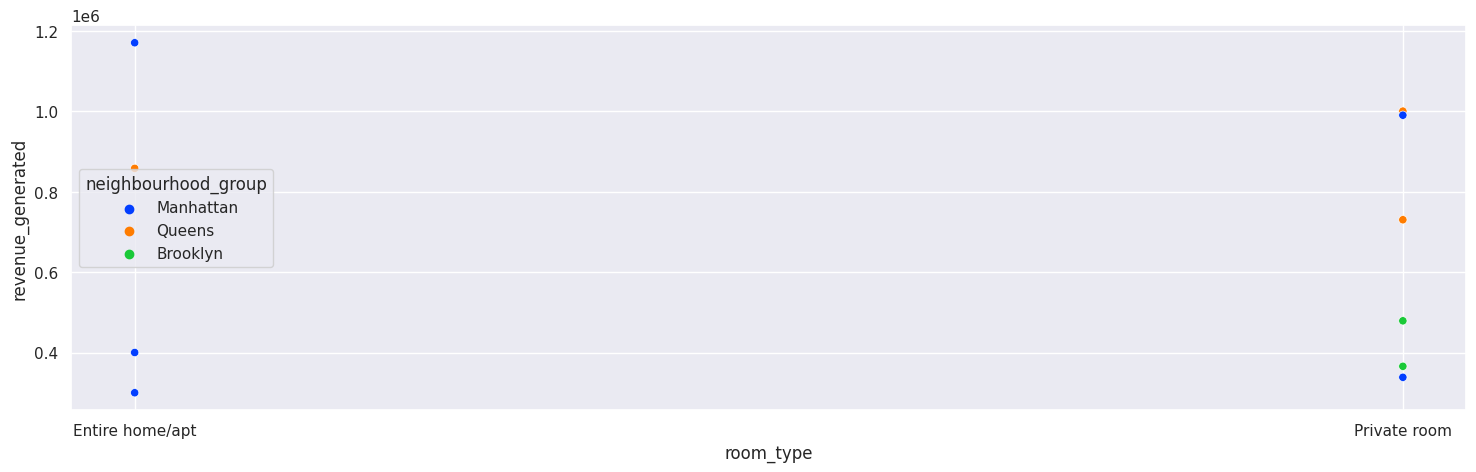

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot(x='room_type', y='revenue_generated', data=top_100_revenue_generators, hue='neighbourhood_group', palette='bright')
plt.show()

### Observations

1. Top 10 revenue generating listings have revenue from a range of 300000 to a whooping 1170000 USD both listed in Manhattan for 30 & 180 days respectively for the same category Entire Home/apt.

2. This list is dominated by Manhattan and Brooklyn, with a few exceptions from Queens too.

3. There are no listings in top 100 from Staten Island and Bronx.

Let's see top revenue generator for each room type in the Neighbourhood Group

In [ ]:
# Find the row with the highest total revenue for each neighborhood group and room type
highest_revenue_rows = df.groupby(['neighbourhood_group', 'room_type']).apply(lambda x: x.loc[x['revenue_generated'].idxmax()])

# Reset the index to remove the group labels
highest_revenue_rows = highest_revenue_rows.reset_index(drop=True)

# Print the listing with the most revenue, neighborhood group, and room type
print(highest_revenue_rows[['host_name','neighbourhood_group','neighbourhood','room_type','revenue_generated']])

   host_name neighbourhood_group       neighbourhood        room_type  \
0       John               Bronx      Spuyten Duyvil  Entire home/apt   
1   Vicdania               Bronx     North Riverdale     Private room   
2     Kadeen               Bronx           Olinville      Shared room   
3       Nony            Brooklyn           Bay Ridge  Entire home/apt   
4    Jeffrey            Brooklyn  Bedford-Stuyvesant     Private room   
5     Samuel            Brooklyn       East Flatbush      Shared room   
6      Jenny           Manhattan             Tribeca  Entire home/apt   
7        Amy           Manhattan     Lower East Side     Private room   
8        Meg           Manhattan   Greenwich Village      Shared room   
9      Iveta              Queens        Forest Hills  Entire home/apt   
10  Kathrine              Queens             Astoria     Private room   
11    Julien              Queens             Astoria      Shared room   
12    Janine       Staten Island          St. Georg

# Conclusion

We peformed EDA on the dataset titled-----> 'Airbnb NYC 2019' to get some insights, we performed both univariate and multivariate analysis and saw how different variables are correlated with each other. The dataset provided was rich in features but those features were hardly correlated.